# Heart Disease Predic Machine Learning Naive Bayes

### Used Libraries
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Sckit learn
6. Missingno

In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input/heart-disease-dataset/heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Reading Data

In [65]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [49]:
df.sample(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
598,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
538,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
738,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
872,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
776,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
165,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
868,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
103,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Pandas Profiling Report

In [51]:
report = pp.ProfileReport(df)

report.to_file("report.html")

report

# Missingno - Missing Data

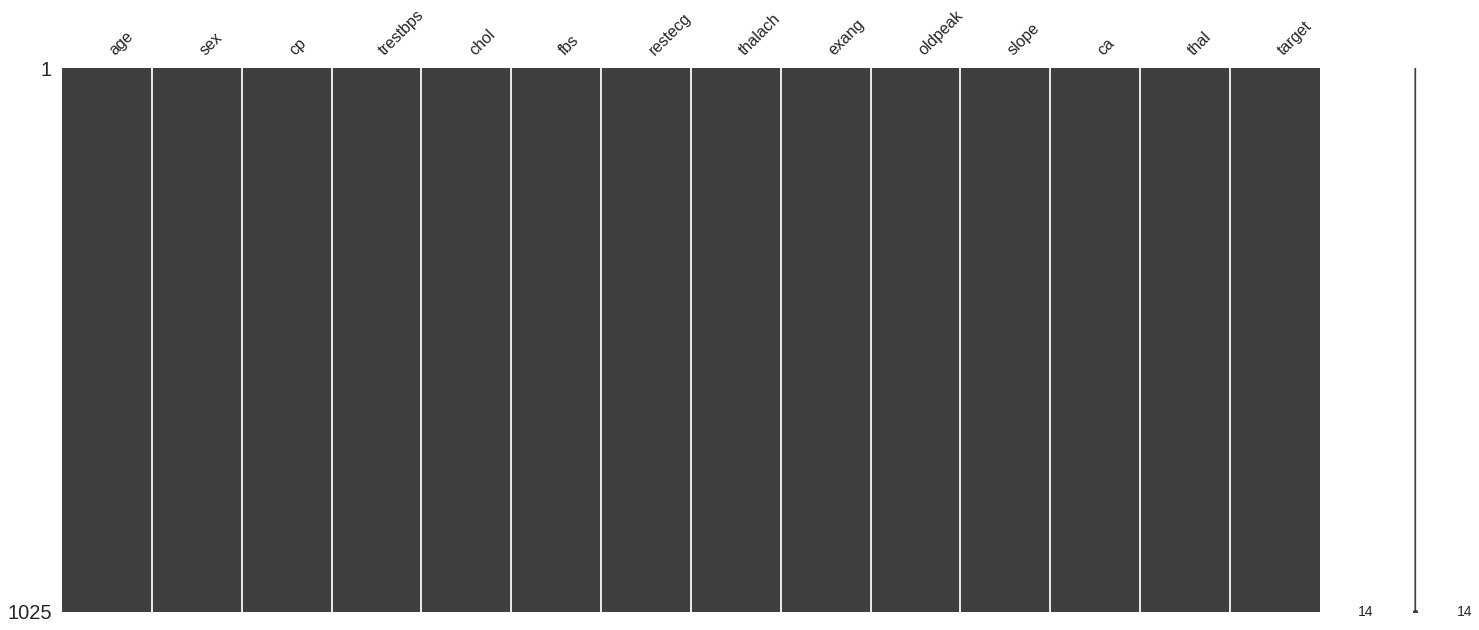

In [52]:
import missingno as msno
msno.matrix(df)
plt.show()

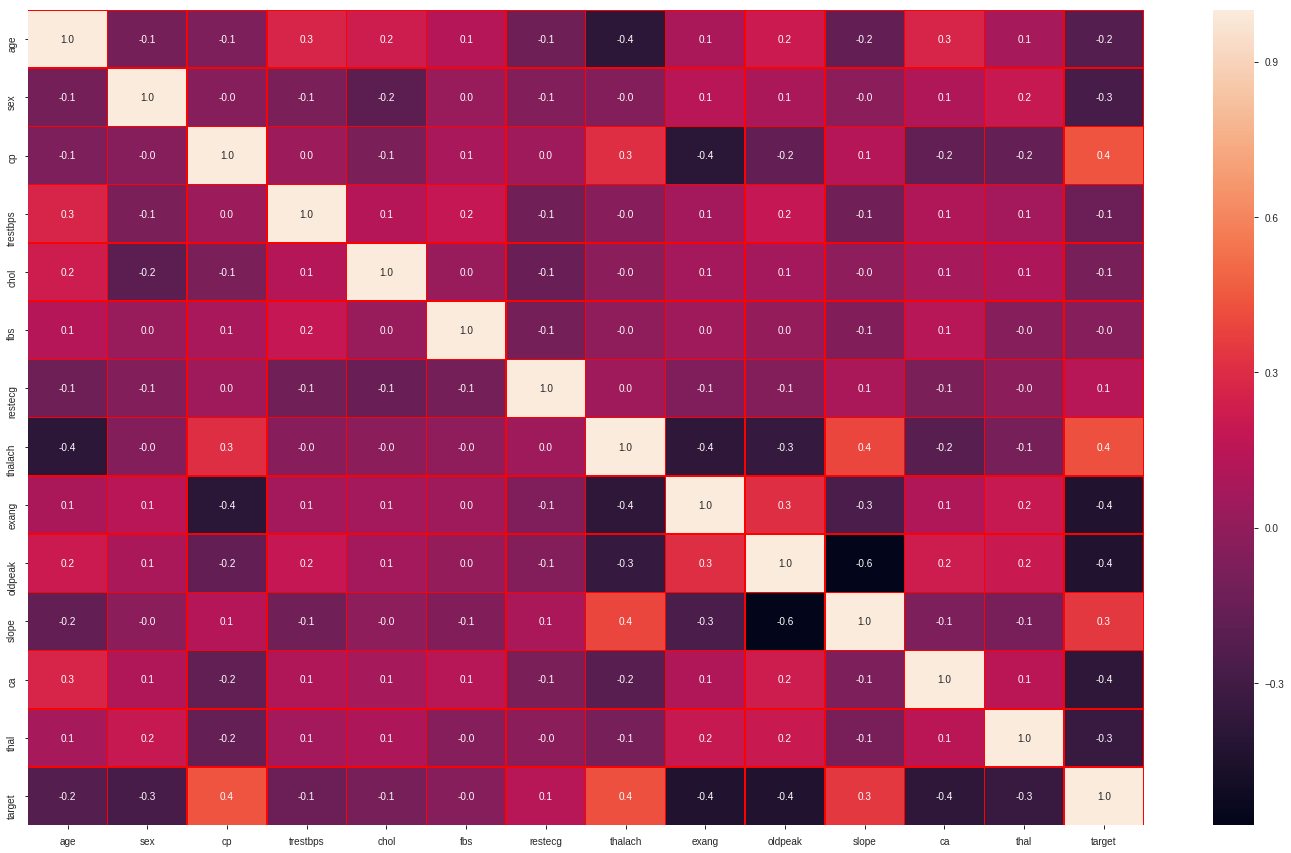

In [53]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Separating Features and Labels

In [54]:
X=df.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [55]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Data Standardisation

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting Dataset into Training Set and Testing Set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Naive Bayes Model with Default Hyperparameter

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy Score

In [59]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8


# Confusion Matrix with Seaborn - Heatmap

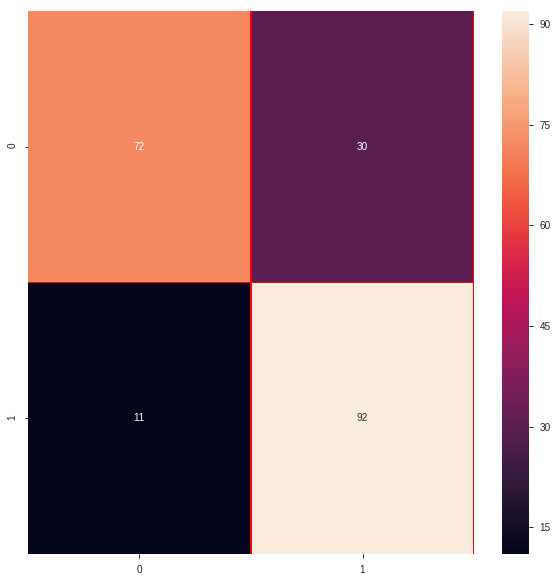

<Figure size 432x288 with 0 Axes>

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [61]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.8177777777777777
